# Sect 25-Pt 1: Intro to Logistic Regression 

- online-ds-ft-100719
- 03/24/20

## Questions?

- Do we scale/normalize data for LogReg?
    - Test it out  
    
- Logistic Regression docstring/parameters
- `age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))`
- Transforming columns with sklearn
    - Column transformer
    - 

## Announcements

- **Sect 25 will be split into 2 study groups.**
- **Sect 26 doesn't introduce much/anything new**
    - It revisits gradient descent and applies it to Logistic Regression.
    - **We will discuss** some of the concepts re-introduced next study group.
    - **We will NOT have an entire study group** dedicated to section 26

## Topics in Sect 25

- For Today:
    - Supervised vs Unsupervised Learning
    - Logistic Regression
    - Evaluating Classifiers (part 1):
        - Confusion Matrices


- For Thursday:
    - Evaluating Classifiers (part 2)
    - Class Imbalance Problems

# Types of Machine Learning Models

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/ai_machine_learning_deep_learning.png">

## Intro to Supervised Learning

> "The term **_Supervised Learning_** refers to a class of machine learning algorithms that can "learn" a task through **_labeled training data_**."

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-intro-to-supervised-learning-v2-1-online-ds-pt-100719/master/images/new_ml-hierarchy.png" width=60%>

# From Linear Regression to Logistic Regression


<img src="https://raw.githubusercontent.com/learn-co-curriculum/ds-lessons-starter/master/logistic_regression/img/linear_vs_logistic_regression.jpg?token=AKWNGY4DACEK65UQB3MKJCC6P2MUS">

## How is it used?

### Linear Regression

Trying to find the **relationship** and predict a specific value.

- Examples of regressions:
    - House prices
    - Salary
    - Reviews/Ratings

### Classification

Trying to identify what features can predict which class a particular observation/row belongs to.
- Can be a "binary classification" 
    - "yes" or "no"
    - Survived or died.
    - Diabetic or not-diabetic
- Can also be a "multiclass classification"
    - Which type of flower?
    - Will a football game end one team winning, or the other team, or a tie?


## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

- Output is specifying the **predicted value** for the target

## Classification: Use Logistic Regression

- Output is specifying the **probability** of belonging to a particular group

- Visual Example:
    - https://www.desmos.com/calculator/y2ilpxiqys

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

# Implementing Logistic Regression

#### Predict Passenger Survival on Titanic

In [1]:
# !pip install fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.16 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

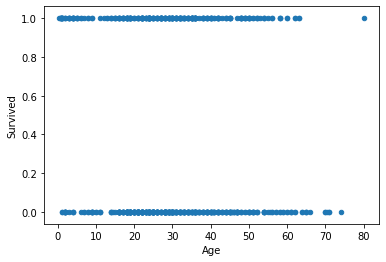

In [7]:
df.plot('Age','Survived',kind='scatter');

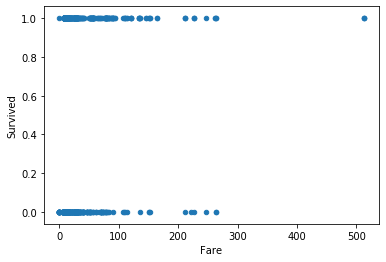

In [5]:
df.plot('Fare','Survived',kind='scatter');

### Q: What are the preprocessing steps I need to perform before I create the model?

- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe apply today)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**

- Train-test-split


### A: 

- Address null values
- Encode categorical data
- Train-test-split
- Train Model with train data
- Evaluate Model with test data

### Preprocessing

In [8]:
## Null Values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

In [17]:
# df[['Age']]

In [14]:
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])


In [19]:
df.shape

(891, 12)

In [18]:
## Fill null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']])
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
df['Cabin'].fillna('Missing',inplace=True)
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:
## Check dtypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
df['Name'].nunique()

891

In [26]:
df.select_dtypes('object').columns

Index(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [30]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
## Encode categorical variables 
x_feats = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
X = pd.get_dummies(df[x_feats],drop_first=True)#
X.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,7.2500,0,1,0,1,0,1
1,38.0,1,71.2833,0,0,0,0,0,0
2,26.0,0,7.9250,0,1,0,0,0,1
3,35.0,1,53.1000,0,0,0,0,0,1
4,35.0,0,8.0500,0,1,0,1,0,1


In [31]:
y = df['Survived'].copy()
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_test.shape

((712, 9), (179,))

In [39]:
## Scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler= MinMaxScaler()

X_train_sca = pd.DataFrame(scaler.fit_transform(X_train), 
                           columns=X_train.columns, index=X_train.index)

X_test_sca = pd.DataFrame(scaler.transform(X_test),
                          columns=X_test.columns, index = X_test.index)

In [41]:
## Verify scaling
X_train_sca.describe().round(2).loc[['min','max']]

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Embarked_Q,Embarked_S
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
X_test_sca.describe().round(2).loc[['min','max']]

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Embarked_Q,Embarked_S
min,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
max,0.89,0.5,0.51,1.0,1.0,1.0,1.0,1.0,1.0



## Fitting a Logistic Regression with `sklearn`

In [43]:
from sklearn.linear_model import LogisticRegression#LinearRegression

In [44]:
help(LogisticRegression)


Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be conv

In [64]:
regr = LogisticRegression(C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

In [ ]:
## Fit a logistic regression model with defaults


In [ ]:
## Fit a logistic regression with params from lab/lessons

In [ ]:
# logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear',
#                            max_iter=1000)

# Evaluating Predictions - Confusion Matrix

- A **confusion matrix** separates our predictions into 4 types of outcomes (for a binary classification):
    - **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

    - **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

    - **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

    - **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

    <img src="https://raw.githubusercontent.com/learn-co-students/dsc-visualizing-confusion-matrices-lab-online-ds-ft-100719/master/images/new_confusion_matrix_2.png" width=50%>

In [46]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,y_hat_test)

0.7262569832402235

In [65]:
## get confusion matrix
cm = confusion_matrix(y_test,y_hat_test)
cm

array([[89, 16],
       [21, 53]])

In [66]:
cm[0].sum()

105

In [67]:
cm.sum(axis=1)

array([105,  74])

In [68]:
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
cm_norm

array([[0.84761905, 0.15238095],
       [0.28378378, 0.71621622]])

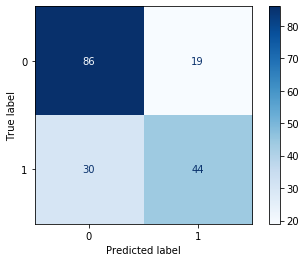

In [69]:
plot_confusion_matrix(regr,X_test,y_test,cmap='Blues')

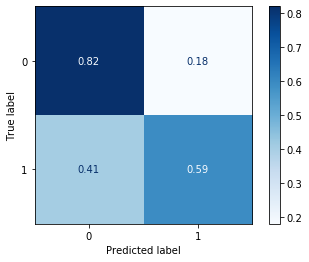

In [70]:
plot_confusion_matrix(regr,X_test,y_test,cmap='Blues',normalize='true')

In [71]:
## COMPARED NOT-SCALED DATA
regr = LogisticRegression(C=1e5, solver='liblinear')
regr.fit(X_train, y_train)

y_hat_test = regr.predict(X_test)

### Visualizing Confusion Matrices

In [61]:
# Here we iterate through the confusion matrix and append labels to our visualization 
def plot_cm(cnf_matrix,thresh=0.5):
    import itertools
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.xticks(ticks=[0,1],labels=['Died','Survived'])
    plt.yticks(ticks=[0,1],labels=['Died','Survived'])

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.colorbar()
    
#     acc = accuracy_score(y_test,/.predict(X_test))
#     plt.title(f"Confusion Matrix (overall acc={round(acc,2)})")
    plt.show()

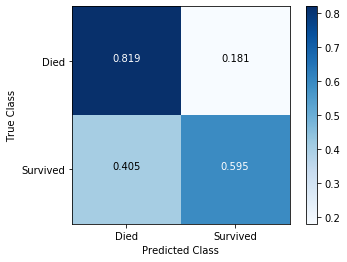

In [63]:

plot_cm(cm_norm.round(3))

0.7932960893854749


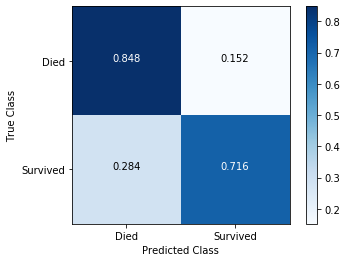

In [74]:
# ## Sklearn Now has a plot_confusion_matrix function (if update)
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(accuracy_score(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

0.7988826815642458


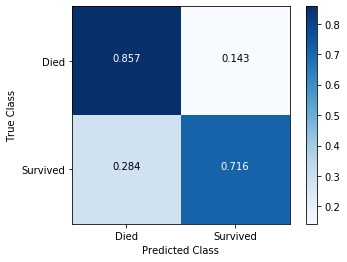

In [77]:
regr = LogisticRegression()#C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(accuracy_score(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

### Other Metrics for Classification

- We will be discussing the other evaluation matrix for classifications on Thursday

# END OF STUDY GROUP 

# Fit a Logistic Regression with statsmodels

- From [Fitting a Logistic Regression Lab](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-25-introduction-to-logistic-regression/fitting-a-logistic-regression-model-lab)

> "Now with everything in place, you can build a logistic regression model using `statsmodels` (make sure you create an intercept term as we showed in the previous lesson).  "
>> Warning: Did you receive an error of the form "LinAlgError: Singular matrix"? This means that `statsmodels` was unable to fit the model due to certain linear algebra computational problems. Specifically, the matrix was not invertible due to not being full rank. In other words, there was a lot of redundant, superfluous data. Try removing some features from the model and running it again.

In [ ]:
# Build a logistic regression model using statsmodels
import statsmodels.api as sm
X_train_sca = sm.tools.add_constant(X_train_sca)
X_test_sca = sm.tools.add_constant(X_test_sca)

In [ ]:
logit_model = sm.Logit(y_train, X_train_sca)
result = logit_model.fit()

In [ ]:
X_train_sca.columns

In [ ]:
sm_cols = [col for col in X_train_sca.columns if "Cabin" not in col]
sm_cols.remove('Pclass_?')

In [ ]:
 X_train_sca[sm_cols].head()

In [ ]:
logit_model = sm.Logit(y_train, X_train_sca[sm_cols])
result = logit_model.fit()
result.summary()

In [ ]:
logit_model = sm.Logit(y, sm.add_constant(X)[sm_cols])
result = logit_model.fit()
result.summary()

In [ ]:
# result.pred_table()

In [ ]:
y_hat_test = result.predict(X_test_sca[sm_cols])
y_hat_test

In [ ]:
pred_survived = y_hat_test>=0.5
pred_survived.astype(int)

In [ ]:
cm = confusion_matrix(y_test,pred_survived.astype(int))
cm

In [ ]:
(88+17)

In [ ]:
np.sum(cm[0])

In [ ]:
np.sum(cm,axis=1)

In [ ]:
cm_norm = cm/np.sum(cm,axis=1)
cm_norm

In [ ]:
# Here we iterate through the confusion matrix and append labels to our visualization 
def plot_cm(cnf_matrix,thresh=0.5):
    import itertools
#     thresh=0.5
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.xticks(ticks=[0,1],labels=['Died','Survived'])
    plt.yticks(ticks=[0,1],labels=['Died','Survived'])

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.colorbar()
    plt.show()
    
    

In [ ]:
plot_cm(cm,thresh=40)

In [ ]:

plot_cm(cm_norm.round(2))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_log,X_test,y_test,normalize='true',cmap='Blues')